### Plot wave spectra

In [68]:
import numpy as np
import xarray as xr
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wavespectra.specarray import SpecArray
from wavespectra.specdataset import SpecDataset
from spec2d_era import spec2d


In [104]:
filepath_wv = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\era5'

dataset = 'era5_spec_2016.nc'

part0 = ['shww', 'mpww', 'mdww', 'dwww']
part1 = ['p140121', 'p140123', 'p140122', 'dwps']
part2 = ['p140124', 'p140126', 'p140125', 'dwps']
part3 = ['p140127', 'p140129', 'p140128', 'dwps']

#dataset = 'csiro_wave_2016.nc'

#part0 = ['phs0', 'ptp0', 'pdir0', 'pspr0']
#part1 = ['phs1', 'ptp1', 'pdir1', 'pspr1']
#part2 = ['phs2', 'ptp2', 'pdir2', 'pspr2']
#part3 = ['phs3', 'ptp3', 'pdir3', 'pspr3']

buoy1_loc = 'Itajaí (PNBOIA)'
buoy1_lat = -27.50
buoy1_lon = -47.50

buoy2_loc = 'Rio Grande (PNBOIA)'
buoy2_lat = -31.50
buoy2_lon = -49.50

buoy3_loc = 'Florianópolis (Rede Ondas)'
buoy3_lat = -27.50
buoy3_lon = -48.00

buoy4_loc = 'Tramandaí (Rede Ondas)'
buoy4_lat = -30.00
buoy4_lon = -49.50

buoy_locs = [buoy1_loc, buoy2_loc, 
             buoy3_loc, buoy4_loc]

output_filenames = ['csiro_spec_itajai.jpg', 'csiro_spec_rg.jpg',
                    'csiro_spec_floripa.jpg', 'csiro_spec_tramanda.jpg']

output_filepath = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\validacao_fronteira'



In [105]:
coords_tpar = [[buoy1_lon, buoy1_lat],
               [buoy2_lon, buoy2_lat],
               [buoy3_lon, buoy3_lat],
               [buoy4_lon, buoy4_lat]]

coords_tpar = np.array(coords_tpar)

In [124]:
%cd $filepath_wv

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\era5


In [125]:
# Open ERA Dataset

wv_xr = xr.open_dataset(dataset)
wv_xr.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (direction: 24, frequency: 30, latitude: 29, longitude: 12, time: 248)
Coordinates:
  * longitude  (longitude) float32 -51.0 -50.5 -50.0 -49.5 ... -46.5 -46.0 -45.5
  * latitude   (latitude) float32 -23.0 -23.5 -24.0 -24.5 ... -36.0 -36.5 -37.0
  * direction  (direction) float64 7.5 22.5 37.5 52.5 ... 322.5 337.5 352.5
  * frequency  (frequency) float64 0.03453 0.03798 0.04178 ... 0.498 0.5478
  * time       (time) datetime64[ns] 2016-07-01 ... 2016-07-31T21:00:00
Data variables:
    d2fd       (time, frequency, direction, latitude, longitude) float32 ...>

In [126]:
%cd $output_filepath

spec_floripa = wv_xr.sel(latitude=buoy2_lat, longitude=buoy2_lon).d2fd.values
spec_rg = wv_xr.sel(latitude=buoy4_lat, longitude=buoy4_lon).d2fd.values

import math
#spec_floripa = spec_floripa/2*math.pi
#spec_floripa = spec_floripa/2*math.pi

#spec_rg = spec_rg/2*math.pi
#spec_rg = spec_rg/2*math.pi

np.save('spec_floripa', spec_floripa)
np.save('spec_rg', spec_rg)

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\validacao_fronteira


In [113]:
spec_floripa.shape

(248, 30, 24)

In [73]:
#wv_xr = wv_xr.sel(time=slice('2016-07-01', '2016-07-31'))
#wv_xr.to_netcdf('wv_xr.nc')

In [84]:
# Select desired sites from ERA netcdf

def wv_bound(coords, nc_file):
    wv_points = []

    for coord in range(len(coords)):
        wv_point = nc_file.sel(dict(latitude=coords[coord][1],
                                    longitude=coords[coord][0]),
                               method='nearest')
        wv_points.append(wv_point)
    return wv_points
    
wv_points = wv_bound(coords_tpar, wv_xr)



In [75]:
# Calculate specs from 1st swell partition

specs_part1 = []
dfs = []

for ds in range(len(wv_points)):
    df = wv_points[ds]
    df = pd.DataFrame(dict(hs=df[part1[0]].values,
                           tp=df[part1[1]].values,
                           dp=df[part1[2]].values,
                           ms=df[part1[3]].values
                          )
                     )
    dfs.append(df)
    
for df in dfs:
    loc = []
    for row in df.itertuples():
        spec = spec2d(row.hs, row.tp, row.dp, row.ms)
        loc.append(spec)
    specs_part1.append(loc)

specs_part1 = np.array(specs_part1)
specs_part1.shape

(4, 744, 25, 36)

In [76]:
# Calculate specs from 2nd swell partition

specs_part2 = []
dfs = []

for ds in range(len(wv_points)):
    df = wv_points[ds]
    df = pd.DataFrame(dict(hs=df[part2[0]].values,
                           tp=df[part2[1]].values,
                           dp=df[part2[2]].values,
                           ms=df[part2[3]].values
                          )
                     )
    dfs.append(df)
    
for df in dfs:
    loc = []
    for row in df.itertuples():
        spec = spec2d(row.hs, row.tp, row.dp, row.ms)
        loc.append(spec)
    specs_part2.append(loc)

specs_part2 = np.array(specs_part2)
specs_part2.shape

(4, 744, 25, 36)

In [77]:
# Calculate specs from 3rd swell partition

specs_part3 = []
dfs = []

for ds in range(len(wv_points)):
    df = wv_points[ds]
    df = pd.DataFrame(dict(hs=df[part3[0]].values,
                           tp=df[part3[1]].values,
                           dp=df[part3[2]].values,
                           ms=df[part3[3]].values
                          )
                     )
    df[df['tp'] == 0] = np.nan
    dfs.append(df)
    
for df in dfs:
    loc = []
    for row in df.itertuples():
        spec = spec2d(row.hs, row.tp, row.dp, row.ms)
        loc.append(spec)
    specs_part3.append(loc)

specs_part3 = np.array(specs_part3)
specs_part3.shape

(4, 744, 25, 36)

In [78]:
# Calculate specs from wind waves

specs_part0 = []
dfs = []

for ds in range(len(wv_points)):
    df = wv_points[ds]
    df = pd.DataFrame(dict(hs=df[part0[0]].values,
                           tp=df[part0[1]].values,
                           dp=df[part0[2]].values,
                           ms=df[part0[3]].values
                          )
                     )
    dfs.append(df)
    
for df in dfs:
    loc = []
    for row in df.itertuples():
        spec = spec2d(row.hs, row.tp, row.dp, row.ms)
        loc.append(spec)
    specs_part0.append(loc)

specs_part0 = np.array(specs_part0)
specs_part0.shape

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\rotinas\spec2d_era.py:67: RuntimeWarning: invalid value encountered in true_divide
  corr = Hs ** 2/(16*trapz_and_repeat(jon, freq))


(4, 744, 25, 36)

In [64]:
specs = []
for point in range(len(coords_tpar)):
    loc = []
    for timestamp in range(0, len(wv_xr.time)):
        spec = (specs_part0[point][timestamp][:][:] + specs_part1[point][timestamp][:][:]
                + specs_part2[point][timestamp][:][:] + specs_part3[point][timestamp][:][:])
        loc.append(spec)
    specs.append(loc)

specs = np.array(specs)
specs.shape

(4, 744, 25, 36)

In [65]:
%cd $output_filepath

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\validacao_fronteira


In [66]:
np.save('specs_era_2016', specs)

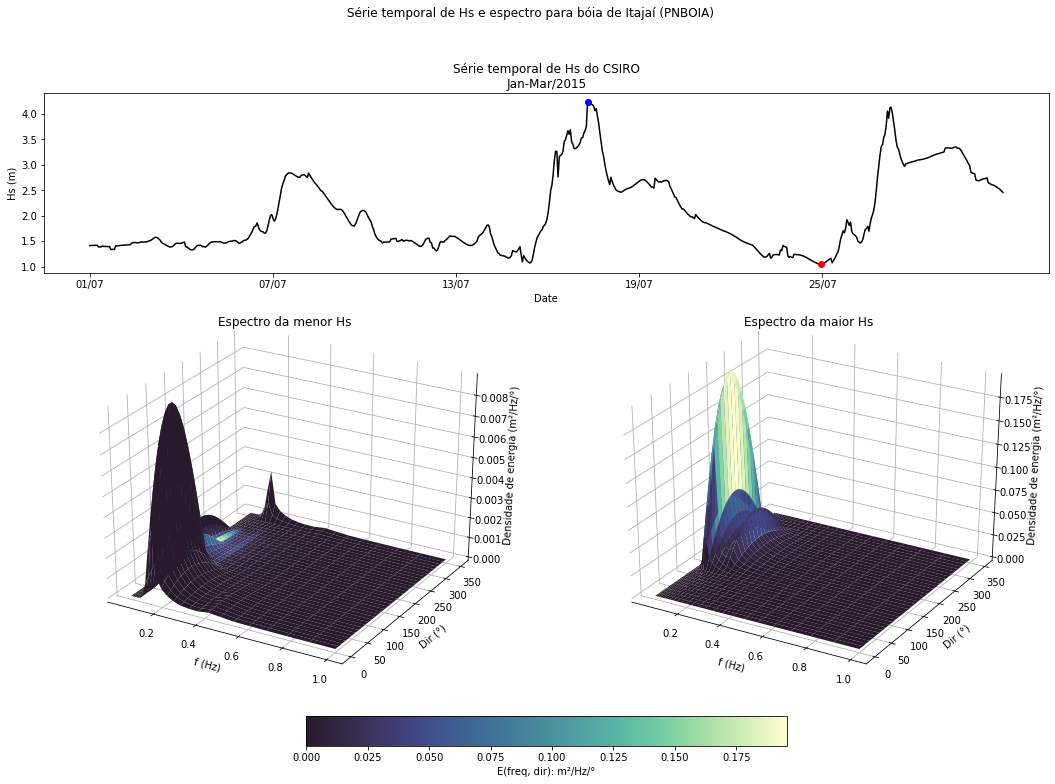

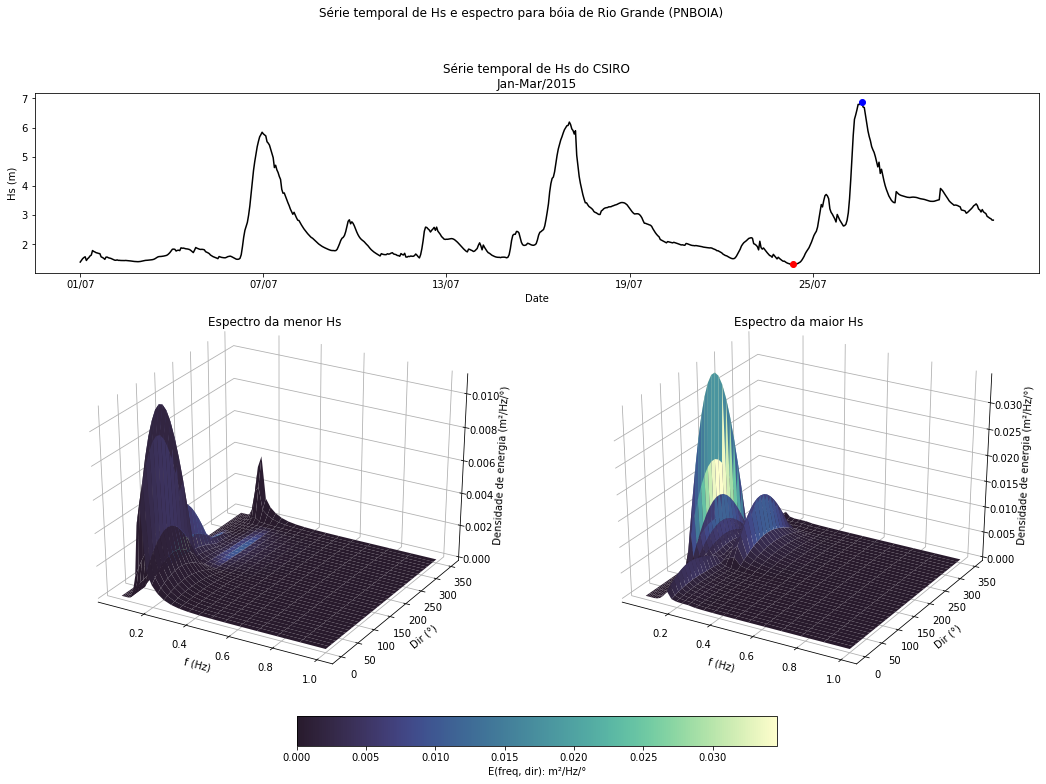

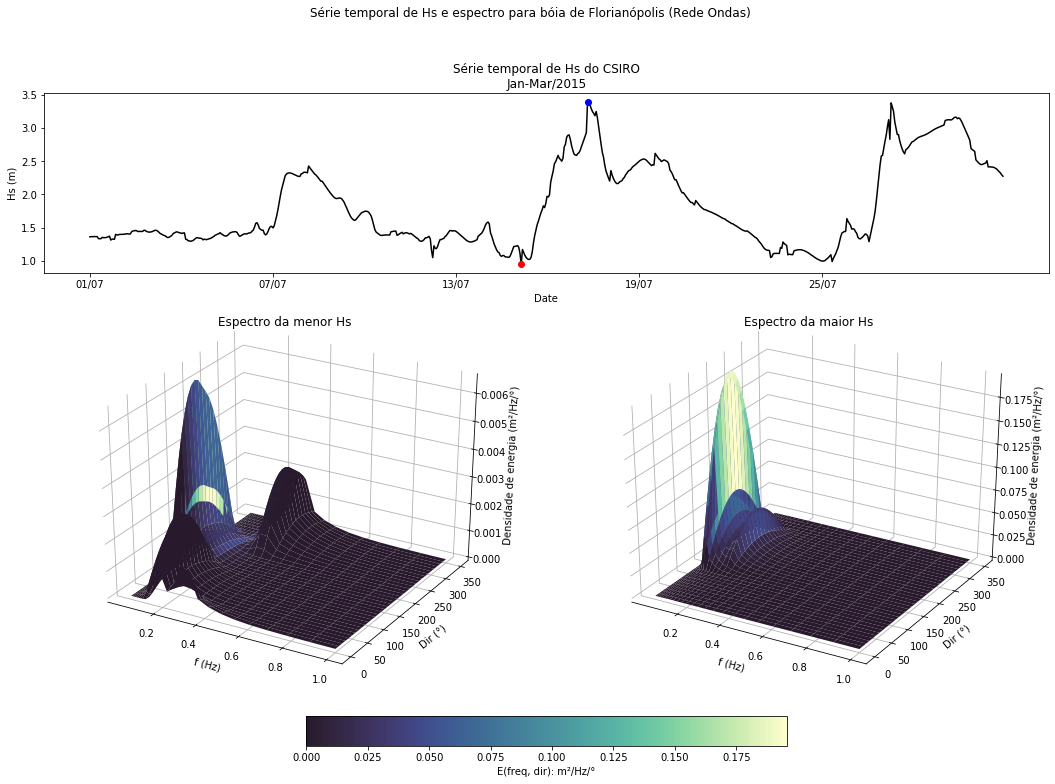

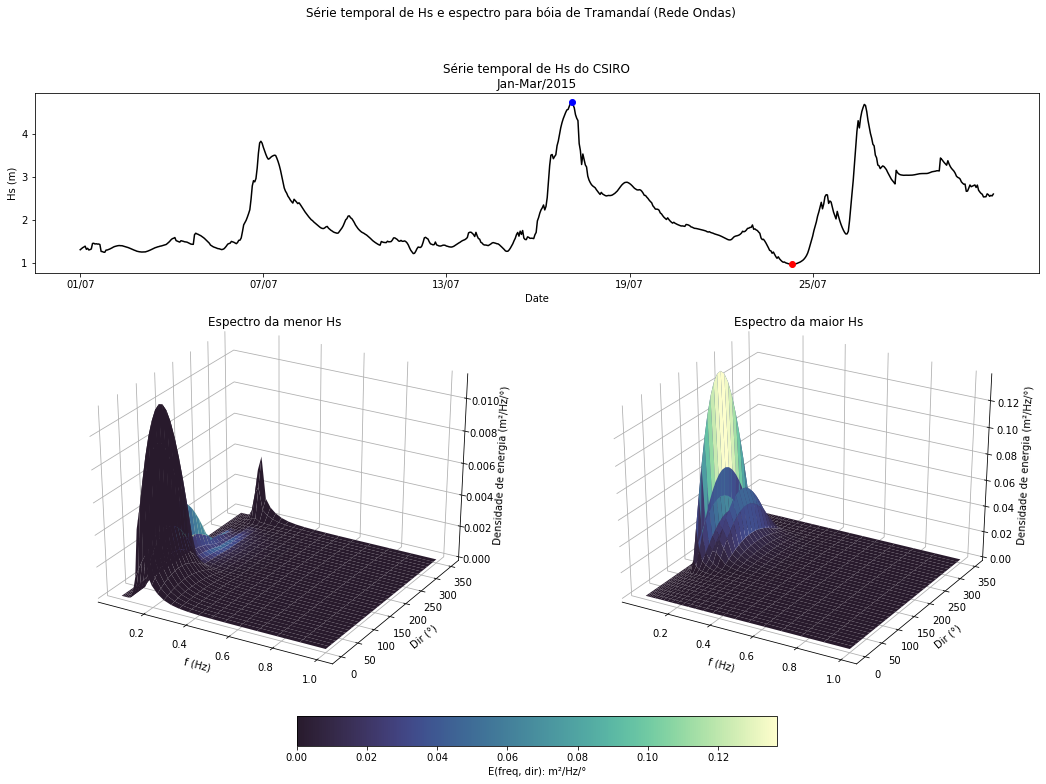

In [79]:
# Plot timeseries and spec for locs

import cmocean

for wv_point in range(len(wv_points)):

    #longitude = list(wv_points.longitude.values)
    #latitude = list(wv_points.latitude.values)
    time = list(wv_points[wv_point]['time'].values)

    freq = [0.0500, 0.0566, 0.0642, 0.0727, 0.0824, 0.0933, 0.1057, 0.1198,
            0.1357, 0.1538, 0.1742, 0.1974, 0.2236, 0.2533, 0.2870, 0.3252,
            0.3684, 0.4174, 0.4729, 0.5357, 0.6070, 0.6877, 0.7791, 0.8827,
            1.0000] # frequncy bin in swan

    directions = list(np.arange(0., 360., 10)) # Directional bin swan

    coords_efth = {'time': time,
                   'freq': freq,
                   'dir': directions}

    efth = xr.DataArray(data=specs[wv_point],
                        coords=coords_efth,
                        dims=('time','freq', 'dir'),
                        name='efth')

    from wavespectra.specarray import SpecArray

    hs = efth.spec.hs()
    tp = efth.spec.tp()

    hs_val = list(hs.values)

    hs_min = hs_val.index(hs.min())
    hs_max = hs_val.index(hs.max())


    %matplotlib inline

    from matplotlib.dates import DateFormatter

    x = hs.time.values
    y = hs.values
    x_ticks = list(np.arange(0, len(efth.time), (len(efth.time)//5+1)))

    # Set up fig and subplot axes

    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize=(18, 12))


    gs = gridspec.GridSpec(4, 4, height_ratios=[1, 1, 1, 1/6])
    ax1 = plt.subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1:3, :2], projection='3d')
    ax3 = fig.add_subplot(gs[1:3, 2:5], projection='3d')
    ax4 = fig.add_subplot(gs[3, 1:3])

    plt.suptitle(f'Série temporal de Hs e espectro para bóia de {buoy_locs[wv_point]}')

    # First subplot
    ax1.plot(x, y, 'black', x[hs_min], y[hs_min], 'ro', x[hs_max], y[hs_max], 'bo')
    ax1.set(xlabel='Date', ylabel='Hs (m)',
            title='Série temporal de Hs do CSIRO\nJan-Mar/2015',
            xticks=(x[x_ticks]))

    # Define the date format
    date_form = DateFormatter("%d/%m")
    ax1.xaxis.set_major_formatter(date_form)


    # Second subplot

    import matplotlib as mpl

    # Organise Data 

    X2, Y2 = np.meshgrid(directions, freq)
    Z2 = specs[wv_point][hs_min]
    Z2b = specs[wv_point][hs_max]

    X1 = np.reshape(X2, -1)
    Y1 = np.reshape(Y2, -1)
    Z1 = np.reshape(Z2, -1)
    Z1b = np.reshape(Z2b, -1)


    # Create 3D axes

    # Get rid of coloured axes planes
    # First remove fill
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax2.xaxis.pane.set_edgecolor('w')
    ax2.yaxis.pane.set_edgecolor('w')
    ax2.zaxis.pane.set_edgecolor('w')

    ax2.set_xlabel('f (Hz)')
    ax2.set_ylabel('Dir (°)')
    ax2.set_zlabel('Densidade de energia (m²/Hz/°)')
    ax2.set(title='Espectro da menor Hs')

    # Bonus: To get rid of the grid as well:
    #ax.grid(False)

    # Get rid of coloured axes planes
    # First remove fill
    ax3.xaxis.pane.fill = False
    ax3.yaxis.pane.fill = False
    ax3.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax3.xaxis.pane.set_edgecolor('w')
    ax3.yaxis.pane.set_edgecolor('w')
    ax3.zaxis.pane.set_edgecolor('w')

    ax3.set_xlabel('f (Hz)')
    ax3.set_ylabel('Dir (°)')
    ax3.set_zlabel('Densidade de energia (m²/Hz/°)')
    ax3.set(title='Espectro da maior Hs')

    # Wireframe w/ colormap

    from matplotlib import cm

    # Normalize the colors based on Z value
    norm = plt.Normalize(Z2.min(), Z2b.max())
    colors = cmocean.cm.deep_r(norm(Z2b))

    surf = ax2.plot_surface(Y2, X2, Z2, 
                            facecolors=colors,
                            #cmap=cm.nipy_spectral,
                            linewidth=0,
                            #antialiased=False,
                            shade=False,
                            rcount=1000,
                            ccount=1000
                           )

    #surf.set_facecolor((0,0,0,0))

    surf2 = ax3.plot_surface(Y2, X2, Z2b, 
                             facecolors=colors,
                             #cmap=cm.nipy_spectral,
                             linewidth=0,
                             #antialiased=False,
                             shade=False,
                             rcount=1000,
                             ccount=1000
                            )

    #surf2.set_facecolor((0,0,0,0))


    cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cmocean.cm.deep_r,
                                    norm=norm,
                                    orientation='horizontal')
    cb1.set_label('''E(freq, dir): m²/Hz/°''')


    plt.savefig(output_filenames[wv_point])
    
    plt.show()
    
    


In [ ]:
time = list(wv_points[0]['time'].values)

freq = np.array([0.0500, 0.0566, 0.0642, 0.0727, 0.0824, 0.0933, 0.1057, 0.1198,
        0.1357, 0.1538, 0.1742, 0.1974, 0.2236, 0.2533, 0.2870, 0.3252,
        0.3684, 0.4174, 0.4729, 0.5357, 0.6070, 0.6877, 0.7791, 0.8827,
        1.0000]) # frequncy bin in swan

directions = np.arange(0., 360., 10) # Directional bin swan

coords_efth = {'time': time,
               'freq': freq,
               'dir': directions}

efth = xr.DataArray(data=specs[3],
                    coords=coords_efth,
                    dims=('time','freq', 'dir'),
                    name='efth')


efth = xr.DataArray(data=specs[0],
                    coords=coords_efth,
                    dims=('time','freq', 'dir'),
                    name='efth')

from wavespectra.specarray import SpecArray

hs = efth.spec.hs()
tp = efth.spec.tp()

hs_val = list(hs.values)

hs_min = hs_val.index(hs.min())
hs_max = hs_val.index(hs.max())



In [ ]:

[th, r] = np.meshgrid(directions, freq)

th = th.transpose(1, 0)
r = r.transpose(1, 0)

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

E = efth[hs_min].values
E = np.rot90(E)
#E = E.transpose(1, 0)

cntf = ax.contourf(th, r, E, cmap='nipy_spectral', extend='both', levels=1000)
                   #levels=np.linspace(np.mean(np.log10(E)), np.amax(np.log10(E)), 15))

#ax.set_rlim(0.05, 0.3)
label_position=ax.get_rlabel_position()
ax.text(np.radians(label_position+25),ax.get_rmax()/1.5,'f (Hz)',
        rotation=label_position,ha='center',va='center')

plt.show()

E.shape


In [ ]:
from wavespectra import read_swan
darray = efth.sortby("dir")
darray.isel(time=0).spec.plot.contourf()

In [ ]:
# Plot specs in cartesian coordinates

for wv_point in range(len(wv_points)):
    freq = np.array([0.0500, 0.0566, 0.0642, 0.0727, 0.0824, 0.0933, 0.1057, 0.1198,
                     0.1357, 0.1538, 0.1742, 0.1974, 0.2236, 0.2533, 0.2870, 0.3252,
                     0.3684, 0.4174, 0.4729, 0.5357, 0.6070, 0.6877, 0.7791, 0.8827,
                     1.0000]) # frequncy bin in swan

    directions = np.arange(0., 360., 10) # Directional bin swan

    coords_efth = {'time': time,
                   'freq': freq,
                   'dir': directions}

    efth = xr.DataArray(data=specs[wv_point],
                        coords=coords_efth,
                        dims=('time','freq', 'dir'),
                        name='efth')
    
    [r, th] = np.meshgrid(freq, directions)
    
    E_min = efth[hs_min].values.transpose()
    E_max = efth[hs_max].values.transpose()


    fig = plt.figure(figsize=(10,6.5))
    
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1/10])
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    
    ax1.contourf(r, th, E_min, cmap='nipy_spectral', levels=1000)
    ax1.set_xlim(0.05, 0.5)
    ax2.contourf(r, th, E_max, cmap='nipy_spectral', levels=1000)
    ax2.set_xlim(0.05, 0.5)
    
    cb1 = mpl.colorbar.ColorbarBase(ax3, cmap=cm.nipy_spectral,
                                    #norm=norm,
                                    orientation='horizontal')
    cb1.set_label('''E(freq, dir): m²/Hz/°''')
    
    ax1.set(xlabel='f (Hz)', ylabel='Dir (°)',
            title='Espectro direcional')
    
    ax2.set(xlabel='f (Hz)', ylabel='Dir (°)',
            title='Espectro direcional')
    
    plt.suptitle(f'Espectros direcionais do CSIRO para boia de {buoy_locs[wv_point]}')
    
    
    
    plt.savefig(output_filenames[wv_point])
    
    
    plt.show()
    
    %matplotlib inline

In [ ]:
pd.DataFrame(th)

In [ ]:

from matplotlib.dates import DateFormatter

x = hs.time.values
y = hs.values
x_ticks = list(np.arange(0, len(efth.time), (len(efth.time)//5+1)))

# Set up fig and subplot axes

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(18, 12))


gs = gridspec.GridSpec(4, 4, height_ratios=[1, 1, 1, 1/6])
ax1 = plt.subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1:3, :2], projection='3d')
ax3 = fig.add_subplot(gs[1:3, 2:5], projection='3d')
ax4 = fig.add_subplot(gs[3, 1:3])

plt.suptitle(f'Série temporal de Hs e espectro para bóia de ')

# First subplot
ax1.plot(x, y, 'black', x[hs_min], y[hs_min], 'ro', x[hs_max], y[hs_max], 'bo')
ax1.set(xlabel='Date', ylabel='Hs (m)',
        title='Série temporal de Hs do ERA5\nJan-Mar/2015',
        xticks=(x[x_ticks]))

# Define the date format
date_form = DateFormatter("%d/%m")
ax1.xaxis.set_major_formatter(date_form)


# Second subplot

import matplotlib as mpl

# Organise Data 

X2, Y2 = np.meshgrid(directions, freq)
Z2 = specs[0][hs_min]
Z2b = specs[0][hs_max]

X1 = np.reshape(X2, -1)
Y1 = np.reshape(Y2, -1)
Z1 = np.reshape(Z2, -1)
Z1b = np.reshape(Z2b, -1)


# Create 3D axes

# Get rid of coloured axes planes
# First remove fill
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax2.xaxis.pane.set_edgecolor('w')
ax2.yaxis.pane.set_edgecolor('w')
ax2.zaxis.pane.set_edgecolor('w')

ax2.set_xlabel('Dir (°)')
ax2.set_ylabel('Freq (Hz)')
ax2.set_zlabel('Energy Density (m²/Hz/°)')
ax2.set(title='Espectro da maior Hs')

# Bonus: To get rid of the grid as well:
#ax.grid(False)

# Get rid of coloured axes planes
# First remove fill
ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax3.xaxis.pane.set_edgecolor('w')
ax3.yaxis.pane.set_edgecolor('w')
ax3.zaxis.pane.set_edgecolor('w')

ax3.set_xlabel('Dir (°)')
ax3.set_ylabel('Freq (Hz)')
ax3.set_zlabel('Energy Density (m²/Hz/°)')
ax3.set(title='Espectro da menor Hs')

# Wireframe w/ colormap

from matplotlib import cm

# Normalize the colors based on Z value
norm = plt.Normalize(Z2.min(), Z2.max())
colors = cm.jet(norm(Z2))

surf = ax2.plot_trisurf(X1, Y1, Z1, 
                       #facecolors=colors,
                       cmap=cm.nipy_spectral,
                       #linewidth=0.3,
                       #shade=False,
                       #rcount=100,
                       #ccount=100
                      )

surf.set_facecolor((0,0,0,0))

surf2 = ax3.plot_trisurf(X1, Y1, Z1b, 
                         #facecolors=colors,
                         cmap=cm.nipy_spectral,
                         #linewidth=0.3,
                         #shade=False,
                         #rcount=100,
                         #ccount=100
                        )

surf2.set_facecolor((0,0,0,0))


cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cm.nipy_spectral,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('''E(freq, dir): m²/Hz/°''')


plt.show()

In [ ]:
%matplotlib notebook

plt.figure(figsize=(8,4))
spec_1d = efth.spec.oned()

X = spec_1d.freq.values
Y = spec_1d[1332].values

plt.plot(X, Y, color='red')


plt.show()